<a href="https://colab.research.google.com/github/jejae3372/Data_science/blob/main/20202073_%EA%B9%80%EC%9E%AC%ED%9A%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **L03.1 Linear Regression Practice**

In [ ]:
import torch

x_train = torch.FloatTensor([[1, 2], [3,2], [3, 7],[1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

w = torch.randn(2, 1)
b = torch.randn(1, 1)
lr = 0.01               #learning rate

for epoch in range(3001):
    w.requires_grad_(True)
    b.requires_grad_(True)

#가설함수 생성 (가설결과를 저장)
    h = x_train @ w + b     #h = ax + b
    cost = torch.mean((y_train - h) ** 2)   #  cost = (가설함수 - 실제 타깃 값) ** 2 의 평균

    cost.backward()
    with torch.no_grad():          #수식을 쓸 떄 사용할 기울기 계산을 잠시 멈춘다.(원래 자동 계산)
        w = w - lr * w.grad     # w, b를 기울기 반대 방향으로 업데이트
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(epoch, cost.item(), w.squeeze(), b)

x_test=torch.FloatTensor([[5,10]])
test_result=torch.mm(x_test, w)+b
print(test_result.item())

#사이킷런으로 실행

from sklearn.linear_model import LinearRegression

x_train = torch.FloatTensor([[1, 2], [3,2], [3, 7],[1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

lr = LinearRegression()

lr.fit(x_train, y_train)

lr.predict([[5, 10]])



0 347.0793151855469 tensor([-1.4734,  0.5317]) tensor([[-1.3124]])
100 1.2769683599472046 tensor([0.5767, 3.2521]) tensor([[-1.6454]])
200 0.6561402678489685 tensor([0.9735, 3.1852]) tensor([[-2.3163]])
300 0.3372015953063965 tensor([1.2634, 3.1332]) tensor([[-2.7934]])
400 0.17329423129558563 tensor([1.4719, 3.0956]) tensor([[-3.1351]])
500 0.08905910700559616 tensor([1.6214, 3.0685]) tensor([[-3.3800]])
600 0.045769162476062775 tensor([1.7286, 3.0491]) tensor([[-3.5555]])
700 0.023521719500422478 tensor([1.8054, 3.0352]) tensor([[-3.6814]])
800 0.012088213115930557 tensor([1.8605, 3.0252]) tensor([[-3.7716]])
900 0.006212359759956598 tensor([1.9000, 3.0181]) tensor([[-3.8362]])
1000 0.0031926711089909077 tensor([1.9283, 3.0130]) tensor([[-3.8826]])
1100 0.0016407233197242022 tensor([1.9486, 3.0093]) tensor([[-3.9158]])
1200 0.000843214918859303 tensor([1.9632, 3.0067]) tensor([[-3.9397]])
1300 0.0004333253891672939 tensor([1.9736, 3.0048]) tensor([[-3.9568]])
1400 0.00022269789769779

array([[35.99999738]])

## **L04.1 Logistic Practice**

0 1.9253371953964233 -0.33199095726013184 0.0867982804775238
100 0.4199797809123993 -1.4550493955612183 4.41852331161499
200 0.39864838123321533 -1.9005370140075684 5.780142784118652
300 0.39078786969184875 -2.175734758377075 6.613820552825928
400 0.3869916498661041 -2.368354082107544 7.194686412811279
500 0.38491448760032654 -2.511402130126953 7.6248626708984375
600 0.38369274139404297 -2.621384620666504 7.954980373382568
700 0.3829398453235626 -2.7078778743743896 8.214244842529297
800 0.3824603855609894 -2.7769827842712402 8.421178817749023
900 0.38214781880378723 -2.832834243774414 8.588298797607422
1000 0.3819402754306793 -2.8783681392669678 8.72446346282959
1100 0.38180074095726013 -2.9157392978668213 8.836165428161621
1200 0.38170579075813293 -2.9465739727020264 8.928295135498047
1300 0.3816407024860382 -2.9721221923828125 9.004606246948242
1400 0.3815957307815552 -2.9933600425720215 9.068026542663574
1500 0.3815644681453705 -3.011063814163208 9.120882034301758
1600 0.38154271245

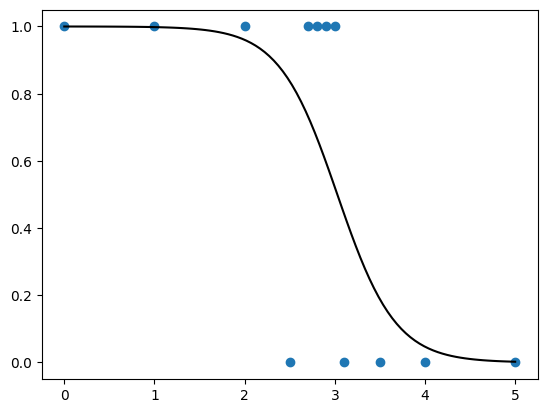

[[-3.10385806]] [9.39776831]
[0 1]


In [ ]:
import torch
X_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

#W, b 랜덤 초기화
W = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(X_train, W) + b)  # X @ W + b 가설함수의 결과
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis))

  cost.backward()

  with torch.no_grad():   #W 와 b를 기울기 반대방향으로 경사하강 업데이트
    W = W - lr * W.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(epoch, cost.item(), W.item(), b.item())

#Test

X_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(X_test, W) + b)
print(torch.round(test_result))


'''
optimizer 사용

W = torch.randn(1, 1, requires_grad_ = True)
b = torch.randn(1, 1, requires_grad_ = True)

lr = 1.0

for epoch in range(3001):

  hypothesis = torch.sigmoid(torch.mm(X_train, W) + b)  # X @ W + b 가설함수의 결과
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis))

  optimizer.zero_grad()
  optimizer = torch.optim.SGD([W, b], lr = 1.0)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item(), W.item(), b.item())

'''

W.requires_grad_(False)
b.requires_grad_(False)

#그래프 그려보기
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X @ W + b)
plt.plot(X, Y, c = 'black')
plt.show()

#기능은 편리

from sklearn.linear_model import LogisticRegression

X_train = [[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty = None)
model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

X_test = [[4.5], [1.1]]
test_result = model.predict(X_test)
print(test_result)


## **L05.1 Softmax Regression Practice**

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn


x_train= torch.FloatTensor([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5], [1,2,5,6],[1,6,6,6],[1,7,7,7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])
#y_train= torch.FloatTensor([[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0], [1,0,0],[1,0,0]])

'''
W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)
optimizer = torch.optim.Adam([W, b], lr=0.1)
'''

#가설함수 간소화
#z = torch.mm(x_train, W)+b

model = nn.Linear(4, 3)
optimizer = torch.optim.Adam(model.parameters(), lr = 1)

for epoch in range(3001):
  #가설함수와 비용함수
  #hypothesis = torch.softmax(torch.mm(x_train, W) + b, dim=1)
  #scost = -torch.mean(torch.sum(y_train * torch.log(hypothesis), dim=1))

  z = model(x_train)

  cost = F.cross_entropy(z, y_train)

  #Pytorch's cross_entropy -> softmax + cross_entropy
  #cost = -torch.mean(torch.sum(y_train * torch.log(torch.softmax(torch.mm(x_train, W)+b, dim=1)), dim = 1))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 300 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
'''
W.requires_grad_(False)
b.requires_grad_(False)

#Test
x_test = torch.FloatTensor([[1, 11, 10, 9], [1, 3, 4, 3], [1, 1, 0, 1]])
test_all = torch.softmax(torch.mm(x_test, W) + b, dim = 1)
print(test_all)
print(torch.argmax(test_all, dim = 1))
'''
#Sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],
                    [1,2,5,6],[1,6,6,6],[1,7,7,7]])

#y에 둘이상의class가존재 => softmax regression
y_train = np.array([2,2,2,1,1,1,0,0])

logistic = LogisticRegression(penalty= None)   #모델생성
logistic.fit(x_train,y_train)     #학습

pred=logistic.predict([[1,11,10,9],[1,3,4,3],[1,1,0,1]])    #testcase(값예측)
print(pred)   #출력

epoch: 0, cost: 1.850962
epoch: 300, cost: 0.027425
epoch: 600, cost: 0.011113
epoch: 900, cost: 0.006072
epoch: 1200, cost: 0.003830
epoch: 1500, cost: 0.002626
epoch: 1800, cost: 0.001902
epoch: 2100, cost: 0.001429
epoch: 2400, cost: 0.001104
epoch: 2700, cost: 0.000870
epoch: 3000, cost: 0.000697
[0 1 2]
